In [1]:
import pandas as pd
import seaborn as sns
from scipy.stats import norm
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder 

%matplotlib inline

Будем работать с датасетом Cars. Здесь собраны проданные с различных веб-ресурсов автомобили в Беларуси. На их примере будем исследовать отчего зависит цена на б/у автомобиль.

In [2]:
data = pd.read_csv('../csv/cars.csv')
data.head(10)

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7
5,Subaru,Outback,automatic,silver,132449,2011,gasoline,False,gasoline,2.5,...,True,False,False,False,True,False,True,True,True,67
6,Subaru,Forester,automatic,black,318280,1998,gasoline,False,gasoline,2.5,...,True,False,False,True,True,False,False,True,True,307
7,Subaru,Legacy,automatic,silver,350000,2004,gasoline,False,gasoline,2.5,...,True,True,False,False,False,False,False,False,True,73
8,Subaru,Outback,automatic,grey,179000,2010,gasoline,False,gasoline,2.5,...,True,True,True,True,True,True,True,True,True,87
9,Subaru,Forester,automatic,silver,571317,1999,gasoline,False,gasoline,2.5,...,True,True,False,False,True,False,False,False,True,43


Исключим из датасета новые автомобили и битые 

In [3]:
data = data[data.state == 'owned']
data

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,Chrysler,300,automatic,silver,290000,2000,gasoline,False,gasoline,3.5,...,True,False,False,True,True,False,False,True,True,301
38527,Chrysler,PT Cruiser,mechanical,blue,321000,2004,diesel,False,diesel,2.2,...,True,False,False,True,True,False,False,True,True,317
38528,Chrysler,300,automatic,blue,777957,2000,gasoline,False,gasoline,3.5,...,True,False,False,True,True,False,False,True,True,369
38529,Chrysler,PT Cruiser,mechanical,black,20000,2001,gasoline,False,gasoline,2.0,...,True,False,False,False,False,False,False,False,True,490


In [4]:
data.body_type.unique()

array(['universal', 'suv', 'sedan', 'hatchback', 'liftback', 'minivan',
       'minibus', 'van', 'pickup', 'coupe', 'cabriolet', 'limousine'],
      dtype=object)

In [5]:
data.color.unique()

array(['silver', 'blue', 'red', 'black', 'grey', 'other', 'brown',
       'white', 'green', 'violet', 'orange', 'yellow'], dtype=object)

Заменяем категориальные переменные на числовые

In [6]:
cleanup_nums = {"transmission":  {"automatic": 0, "mechanical": 1},
                "engine_fuel": {"gasoline": 0, "diesel": 1, "gas": 2,"hybrid-petrol":3,"hybrid-diesel":4,"electric":5},
                "engine_type": {"gasoline": 0, "diesel": 1,"electric":2},
                "drivetrain": {"all": 0, "front": 1, "rear":2},
                "body_type": {"universal":0, "suv":1, "sedan":2, "hatchback":3, "liftback":4, "minivan":5,
                              "minibus":6, "van":7, "pickup":8, "coupe":9, "cabriolet":10, "limousine":11},
                "location_region": {"Минская обл.":0, "Гомельская обл.":1, "Брестская обл.":2, 
                                    "Могилевская обл.":3, "Витебская обл.":4, "Гродненская обл.":5},
                "color": {"white":0, "black":1,
                          "silver":2, "blue":3, "red":4, "grey":5,
                          "brown":6, "green":7, "violet":8, "orange":9, "yellow":10, "other":11}
               }

In [7]:
data = data.replace(cleanup_nums)
data["location_region"]

0        0
1        0
2        0
3        0
4        1
        ..
38526    0
38527    2
38528    0
38529    2
38530    0
Name: location_region, Length: 37723, dtype: int64

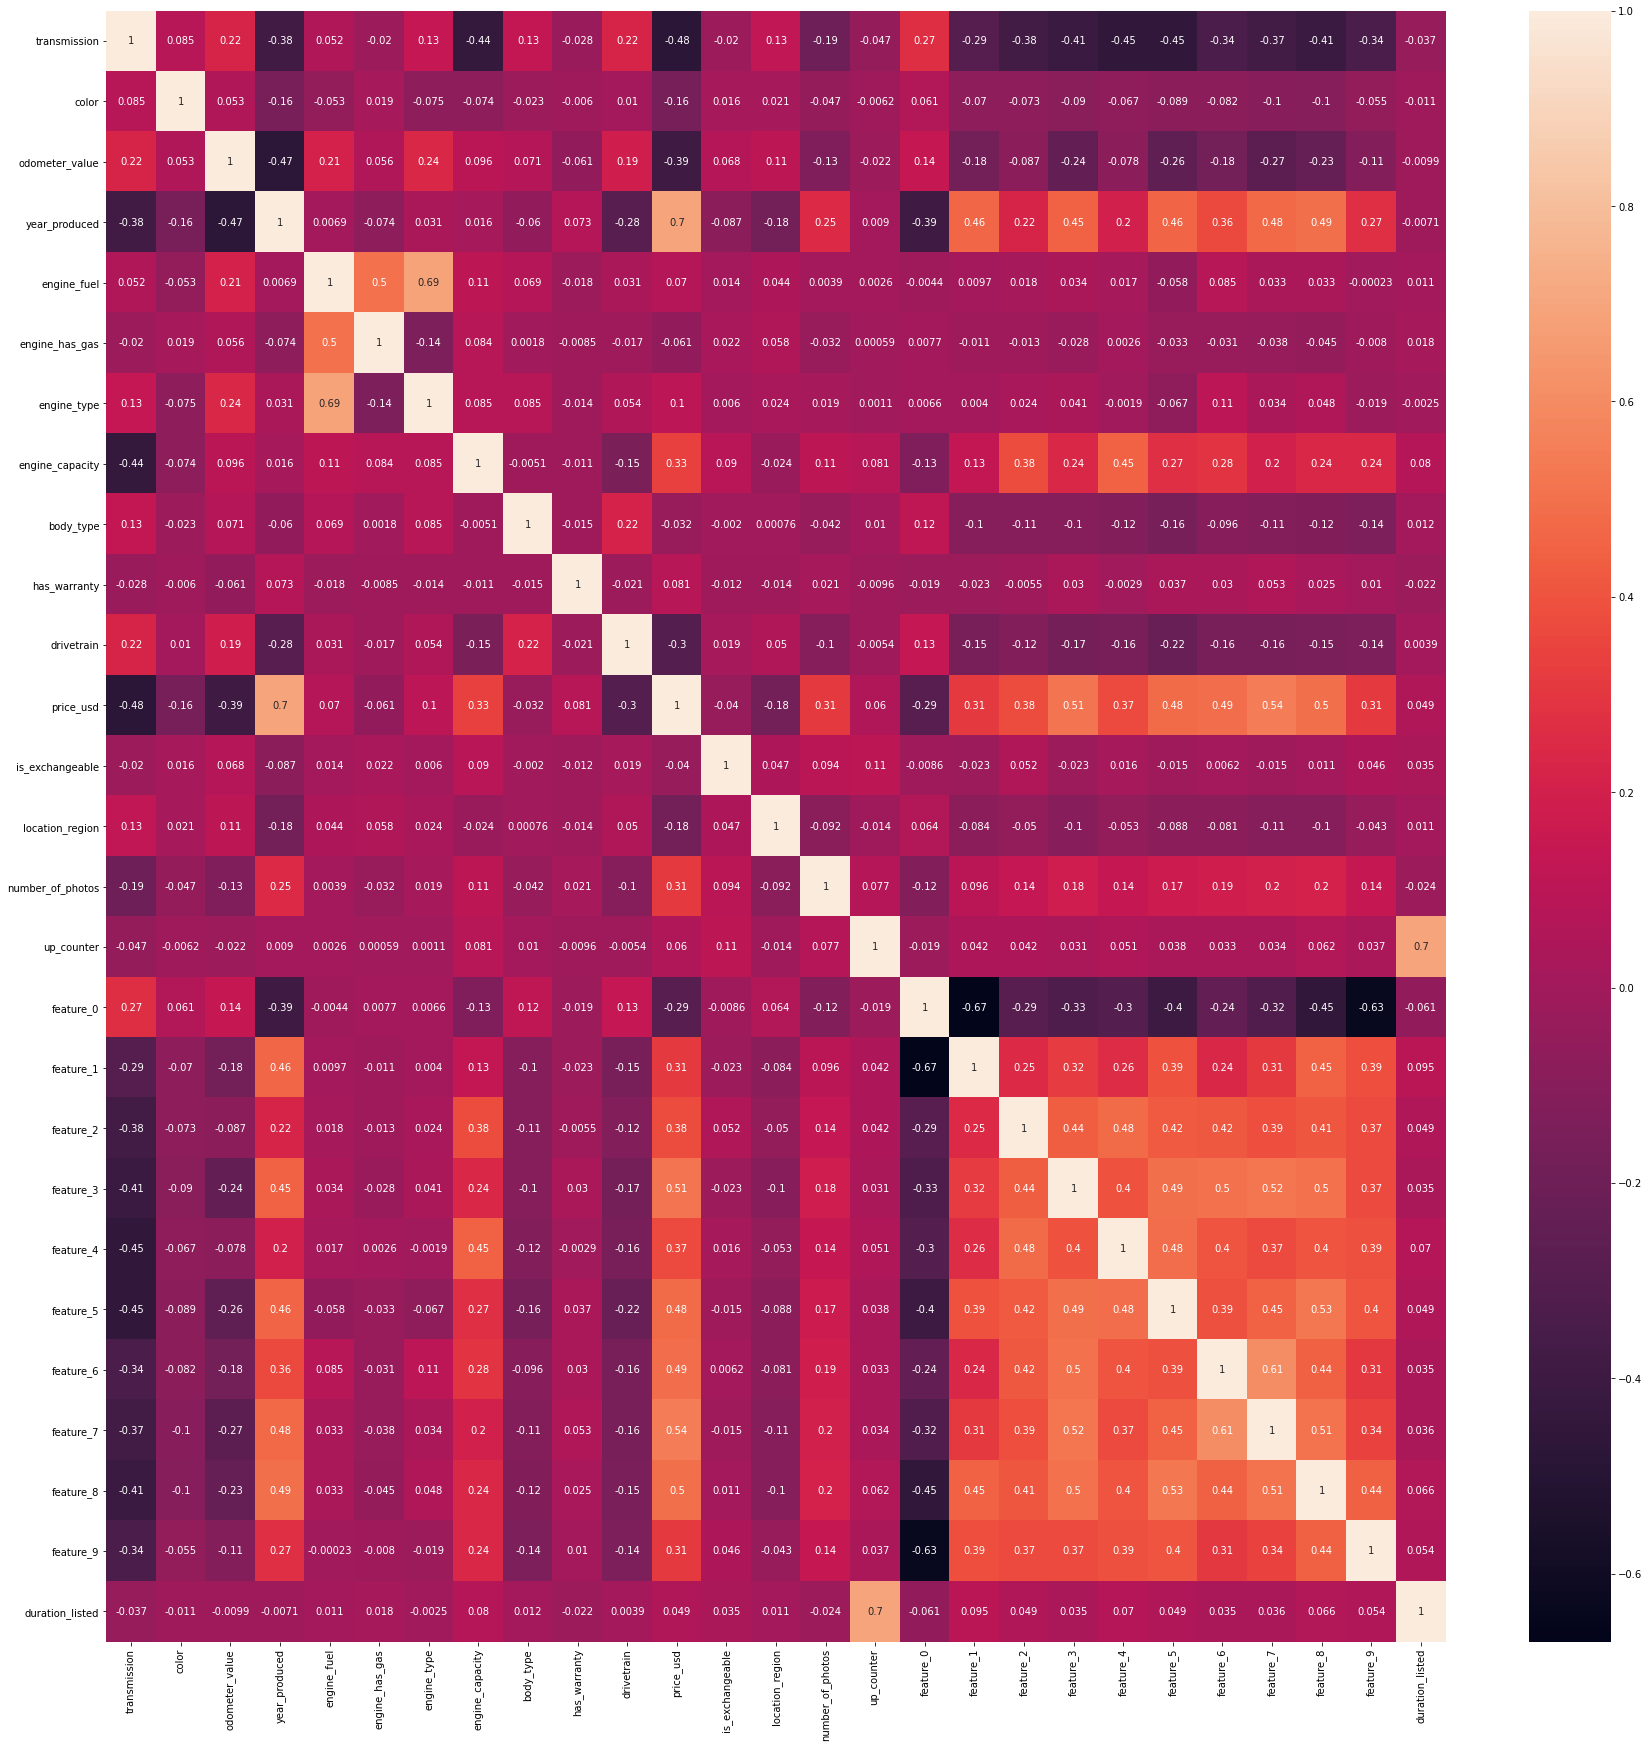

In [8]:
plt.figure(figsize=(30, 30))
cor_matrix = data.corr()
sns.heatmap(cor_matrix, annot=True)
plt.show()


Исключим из датасета столбцы "up_counter","duration_listed","is_exchangeable" т.к. это 
относится к хар-кам объявления, а не самой машины

In [9]:
data.pop('duration_listed')
data.pop('is_exchangeable')
data.pop('up_counter')
data.columns

Index(['manufacturer_name', 'model_name', 'transmission', 'color',
       'odometer_value', 'year_produced', 'engine_fuel', 'engine_has_gas',
       'engine_type', 'engine_capacity', 'body_type', 'has_warranty', 'state',
       'drivetrain', 'price_usd', 'location_region', 'number_of_photos',
       'feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
       'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9'],
      dtype='object')

Из графика корреляции видно, что: чем больше пробег автомобиля, то тем меньше цена; чем старше автомобиль, то тем меньше цена; у б/у автомобилей зависимость цены от двигателя зависят слабо. Коэффициент кореляции объема двигателя от цены 0.33; Также из графика видно что наличие фич влияет на стоимость автомобиля. Причем видно, что наличие feature_7 в машине влияет на стоимость не мало, т.к. коэффициент корелляции 0.54. В описании к дата сету не указана указано что это за опции конкретно.

Рассмотрим влияние категориальных параметров по отдельности

### Регион продажи

Посчитаем среднюю стоимость автомобилей в разных регионах Беларуси.

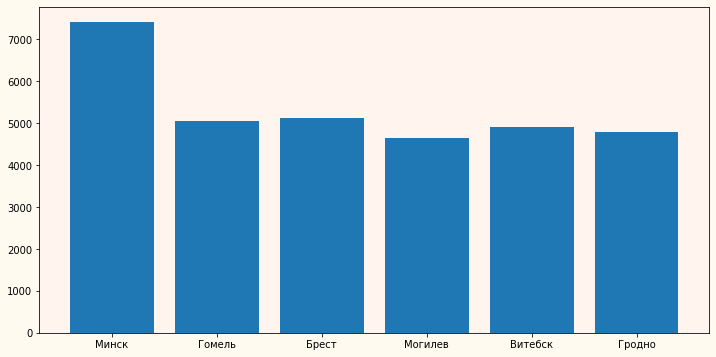

In [10]:
import numpy as np
import matplotlib.pyplot as plt

x_region = ['Минск', 'Гомель', 'Брест', 'Могилев', 'Витебск', 'Гродно']
y_region = [data[data.location_region == 0].price_usd.mean(), data[data.location_region == 1].price_usd.mean(), data[data.location_region == 2].price_usd.mean(),data[data.location_region == 3].price_usd.mean(), data[data.location_region == 4].price_usd.mean(),data[data.location_region == 5].price_usd.mean()]

     
fig, ax = plt.subplots()

ax.bar(x_region, y_region)

ax.set_facecolor('seashell')
fig.set_facecolor('floralwhite')
fig.set_figwidth(12)
fig.set_figheight(6) 

plt.show()

Как видно из графика самые высокая стоимость на машину будет в столице Минске и ее области. Средняя стоимость на 2000usd больше чем в остальных регионах. Немного выше в Гомельской и Бресткой областях. Значит цена на автомобиль зависит не так сильно, если брать автомобиль с региона, а не со столицы.

### Трансмиссия

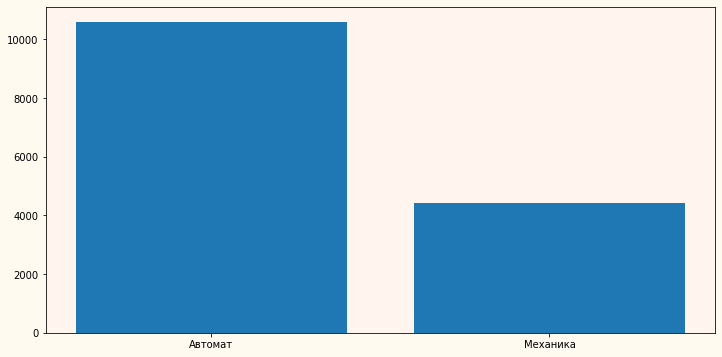

In [11]:
x_transmission = ['Автомат', 'Механика']
y_transmission= [data[data.transmission == 0].price_usd.mean(), data[data.transmission == 1].price_usd.mean()]

     
fig, ax = plt.subplots()

ax.bar(x_transmission, y_transmission)

ax.set_facecolor('seashell')
fig.set_facecolor('floralwhite')
fig.set_figwidth(12)
fig.set_figheight(6) 

plt.show()

Как видно из графика цена на машину с автоматом выше в 2,5 раза. Но здесь не учитывается другие параметры, такие как год выпуска, пробег и тд. Поэтому возьмем автмобили одного года выпуска и с пробегом в 50-100 тысяч километров с объемом двигателя от 1,4 до 2,0 с передним приводом с бензиновым двигателем

In [12]:
data_transmission = data[(data.year_produced == 2015)&(data.odometer_value >= 50000)&
                         (data.odometer_value <= 100000)&(data.engine_type==0)&
                         (data.engine_capacity >= 1.4)&(data.engine_capacity <= 2.0)
                        ]
data_transmission

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9
140,Subaru,Forester,0,0,80467,2015,0,False,0,2.0,...,False,True,False,True,False,True,False,True,True,True
281,Subaru,Forester,0,5,79000,2015,0,False,0,2.0,...,False,True,False,False,False,True,False,True,True,True
337,LADA,Kalina,1,5,70000,2015,0,False,0,1.6,...,True,False,False,False,False,False,False,False,False,False
350,LADA,Largus,1,0,85000,2015,0,False,0,1.6,...,False,True,False,True,False,True,False,True,False,False
405,LADA,Kalina,1,2,53000,2015,0,False,0,1.6,...,False,True,False,False,False,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34408,Mercedes-Benz,GLA250,0,3,62000,2015,0,False,0,2.0,...,False,True,True,True,True,True,True,True,True,True
34545,Mercedes-Benz,C180,0,1,100000,2015,0,False,0,1.8,...,False,True,True,True,True,True,True,True,True,False
34917,Mercedes-Benz,CLA200,0,2,94000,2015,0,False,0,1.6,...,False,True,True,True,True,True,True,True,True,True
35074,Mercedes-Benz,C180,0,5,84000,2015,0,False,0,1.6,...,False,True,True,True,True,True,False,True,True,True


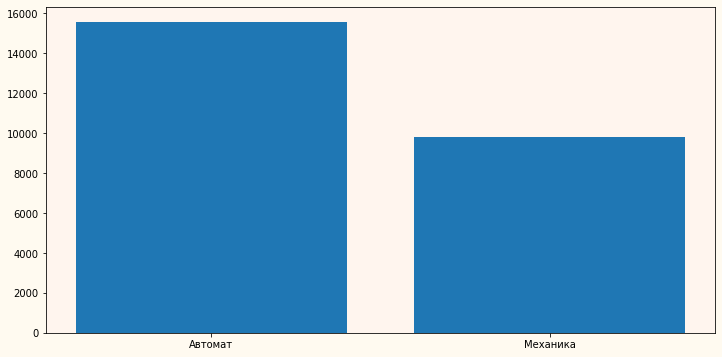

In [13]:
x_transmission2 = ['Автомат', 'Механика']
y_transmission2= [data_transmission[data_transmission.transmission == 0].price_usd.mean(), data_transmission[data_transmission.transmission == 1].price_usd.mean()]

     
fig, ax = plt.subplots()

ax.bar(x_transmission2, y_transmission2)

ax.set_facecolor('seashell')
fig.set_facecolor('floralwhite')
fig.set_figwidth(12)
fig.set_figheight(6) 

plt.show()

Из графика видно, что автомобиль на автомате все также ощутимо дороже, но не в 2.5 раза. Автомобиль на автомате будет дороже такого же автомобиля на механике.  

### Привод

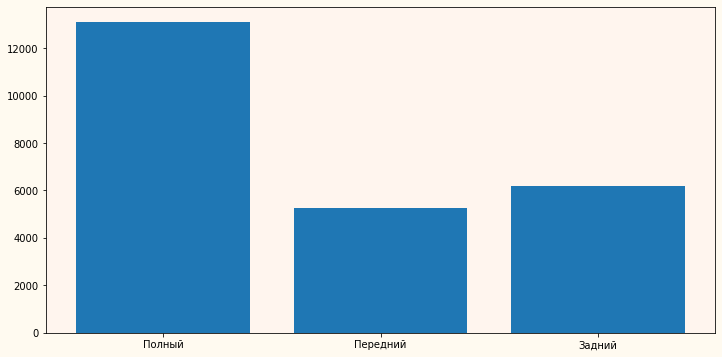

In [14]:
x_drivetrain = ['Полный', 'Передний','Задний']
y_drivetrain= [data[data.drivetrain == 0].price_usd.mean(),data[data.drivetrain == 1].price_usd.mean(),data[data.drivetrain == 2].price_usd.mean()]

     
fig, ax = plt.subplots()

ax.bar(x_drivetrain, y_drivetrain)

ax.set_facecolor('seashell')
fig.set_facecolor('floralwhite')
fig.set_figwidth(12)
fig.set_figheight(6) 

plt.show()

Кол-во автомобилей с полным приводом

In [15]:
data[data.drivetrain == 0].model_name .count()

5227

Кол-во автомобилей с передним приводом

In [16]:
data[data.drivetrain == 1].model_name.count()

27166

Кол-во автомобилей с задним приводом

In [17]:
data[data.drivetrain == 2].model_name.count()

5330

Автомобилей с передним приводом слишком много, поэтому возьмем из них 5330 рандомных автомобилей.

In [18]:
data_front = data[(data.drivetrain == 1)]
data_front

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9
26,Subaru,Outback,0,7,417000,1997,0,False,0,2.0,...,False,True,False,False,False,True,False,False,False,True
51,Subaru,Impreza,1,3,143000,2009,0,False,0,1.5,...,False,False,False,False,False,False,False,False,True,False
71,Subaru,Impreza,1,4,363500,1994,0,False,0,2.0,...,False,False,False,False,False,False,False,False,False,True
79,Subaru,Forester,1,7,270000,1998,0,False,0,2.5,...,False,True,False,False,False,True,False,False,True,True
103,Subaru,Justy,1,2,170000,2008,0,False,0,1.0,...,False,True,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,Chrysler,300,0,2,290000,2000,0,False,0,3.5,...,False,True,False,False,True,True,False,False,True,True
38527,Chrysler,PT Cruiser,1,3,321000,2004,1,False,1,2.2,...,False,True,False,False,True,True,False,False,True,True
38528,Chrysler,300,0,3,777957,2000,0,False,0,3.5,...,False,True,False,False,True,True,False,False,True,True
38529,Chrysler,PT Cruiser,1,1,20000,2001,0,False,0,2.0,...,False,True,False,False,False,False,False,False,False,True


In [19]:
data_front=data_front.sample(n = 5330) 
data_front

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9
9320,Fiat,Tempra,1,7,361000,1991,0,False,0,1.6,...,True,False,False,False,False,False,False,False,False,False
12797,Renault,Megane,1,11,26485,1998,1,False,1,1.9,...,True,False,False,False,False,False,False,False,False,False
37814,Peugeot,406,1,2,390600,1999,1,False,1,2.0,...,False,True,False,False,False,False,False,False,False,True
31118,Mazda,626,1,11,386000,1989,0,False,0,2.0,...,True,False,False,False,False,False,False,False,False,False
2061,Opel,Sintra,1,2,350000,1999,1,False,1,2.2,...,False,True,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1876,Opel,Vectra,1,3,355000,2005,1,False,1,2.2,...,False,True,True,False,False,True,True,True,False,True
16546,Volkswagen,Golf,1,0,311000,1990,0,False,0,1.6,...,True,False,False,False,False,False,False,False,False,False
12562,Renault,Clio,1,0,65000,2015,1,False,1,1.5,...,False,True,False,False,False,False,False,True,True,False
37960,Peugeot,406,1,7,264800,1997,0,False,0,1.8,...,False,True,False,False,True,True,False,False,False,True


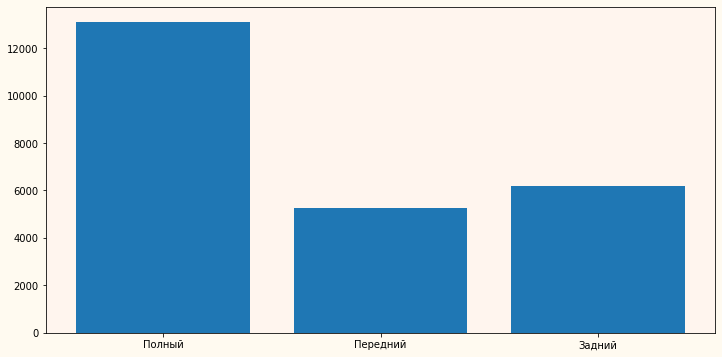

In [20]:
x_drivetrain = ['Полный', 'Передний','Задний']
y_drivetrain= [data[data.drivetrain == 0].price_usd.mean(),data_front[data_front.drivetrain == 1].price_usd.mean(),data[data.drivetrain == 2].price_usd.mean()]

fig, ax = plt.subplots()

ax.bar(x_drivetrain, y_drivetrain)

ax.set_facecolor('seashell')
fig.set_facecolor('floralwhite')
fig.set_figwidth(12)
fig.set_figheight(6) 

plt.show()

Графики изменились не сильно. Полный привод дороже заднего и переднего привода в среднем в два раза. Передний привод оказался дешевле всех.

### Тип двигателя

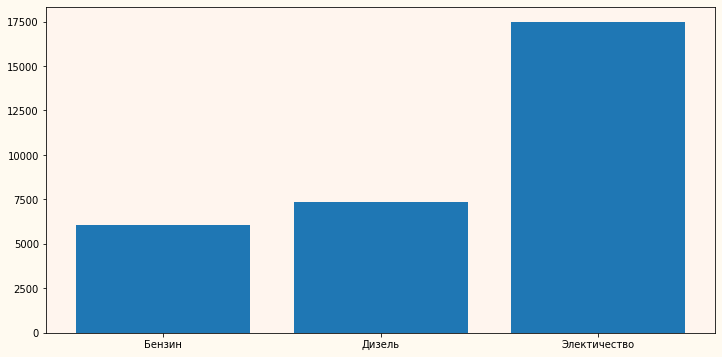

In [21]:
x_engine = ['Бензин', 'Дизель','Электичество']
y_engine= [data[data.engine_type == 0].price_usd.mean(),data[data.engine_type == 1].price_usd.mean(),data[data.engine_type == 2].price_usd.mean()]

     
fig, ax = plt.subplots()

ax.bar(x_engine, y_engine)

ax.set_facecolor('seashell')
fig.set_facecolor('floralwhite')
fig.set_figwidth(12)
fig.set_figheight(6) 

plt.show()

In [22]:
data[data.engine_type == 2].model_name.count()

10

Из графика видно, что автомобиль на электричестве стоит очень дорого и их очень мало.  

Сравним стоимость дизельного и бензинового авто. Ниже видно, что бензиновые автомобили занимают большую часть рынка в сравнении с дизелем. Уравняем кол-во дизельных и бензиновых авто, и сравним их стоимость

In [23]:
data[data.engine_type == 1].model_name.count()

12734

In [24]:
data[data.engine_type == 0].model_name.count()

24979

In [25]:
data_gasoline = data[data.engine_type==0]
data_gasoline=data_gasoline.sample(n = 12734) 
data_gasoline

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9
26577,Nissan,Almera,1,2,310000,2000,0,False,0,1.5,...,False,True,False,True,False,True,False,False,False,False
5030,Lexus,IS,0,2,210000,2006,0,False,0,2.5,...,False,True,False,True,True,True,False,True,True,True
1272,Kia,Optima,0,5,15000,2017,0,False,0,2.4,...,False,False,True,True,False,True,True,True,True,True
26561,Nissan,Primera,1,2,387000,1998,0,False,0,2.0,...,False,True,False,False,False,False,False,False,False,False
29231,BMW,X5,0,1,290000,2005,2,True,0,3.0,...,False,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19694,Audi,Q5,0,1,157500,2013,0,False,0,2.0,...,False,False,False,False,False,False,True,False,False,False
5503,Mitsubishi,Outlander,0,0,144000,2014,0,False,0,2.4,...,False,False,False,True,True,True,False,True,True,True
25353,Hyundai,Elantra,0,1,328306,2007,0,False,0,2.0,...,False,True,False,False,False,False,False,False,False,False
33586,Honda,Civic,0,2,297000,2001,0,False,0,1.7,...,False,True,False,False,False,False,False,False,False,True


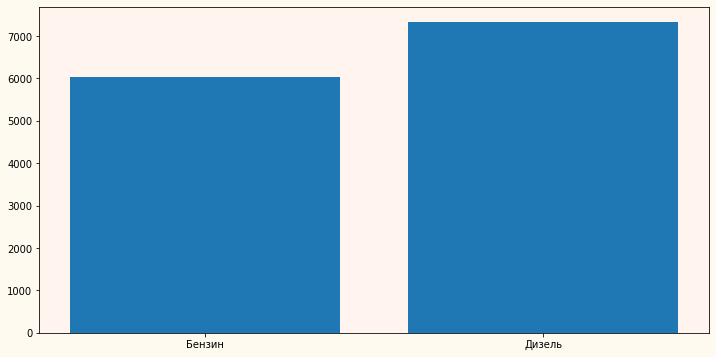

In [26]:
x_engine2 = ['Бензин', 'Дизель']
y_engine2= [data[data.engine_type == 0].price_usd.mean(),data[data.engine_type == 1].price_usd.mean()]
     
fig, ax = plt.subplots()

ax.bar(x_engine2, y_engine2)

ax.set_facecolor('seashell')
fig.set_facecolor('floralwhite')
fig.set_figwidth(12)
fig.set_figheight(6) 

plt.show()

Стоимость на дизельный автомобиль выше чем на бензиновый в среднем на 1000usd.

### ГБО на автомобиле

Проверим, влияет ли наличие ГБО на цену автомобиля

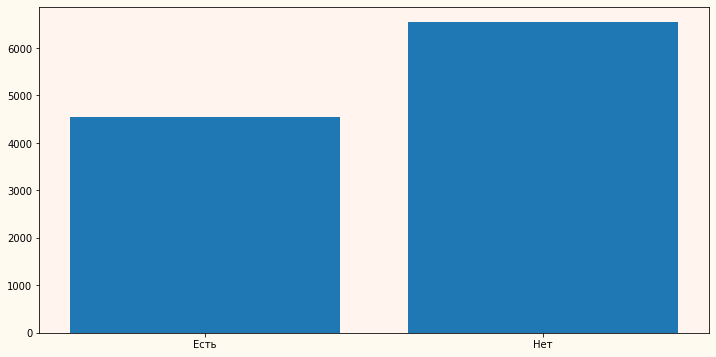

In [27]:
x_gas = ['Есть', 'Нет']
y_gas= [data[data.engine_has_gas == True].price_usd.mean(),data[data.engine_has_gas == False].price_usd.mean()]

     
fig, ax = plt.subplots()

ax.bar(x_gas, y_gas)

ax.set_facecolor('seashell')
fig.set_facecolor('floralwhite')
fig.set_figwidth(12)
fig.set_figheight(6) 

plt.show()

Автомобиль с ГБО стоит дешевле чем автомобиль без него.

### Наличие гарантии на автомобиль

In [28]:
data[data.has_warranty == True].year_produced.min()

1998

Самый старший автомобиль стоящий на гарантии 1998 года выпуска. Это очень редкий случай, поэтому в качестве метрики возьмем средний год выпуска.

In [29]:
data[data.has_warranty == True].year_produced.mean()

2015.9054054054054

Возьмем автомобили моложе 2015 года не стоящие на гарантии и автомобили стоящие на гарантии и сравним их стоимость

In [30]:
data2015 = data[(data.year_produced>=2015)&(data.has_warranty==False)]
data2015

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9
36,Subaru,Outback,0,7,128748,2016,0,False,0,3.6,...,False,True,False,True,True,True,True,True,True,True
93,Subaru,Impreza,0,2,80000,2016,0,False,0,2.0,...,False,False,False,False,False,True,True,True,False,False
120,Subaru,Outback,0,4,56800,2015,0,False,0,2.5,...,False,True,False,False,False,True,True,True,True,True
140,Subaru,Forester,0,0,80467,2015,0,False,0,2.0,...,False,True,False,True,False,True,False,True,True,True
153,Subaru,Forester,0,11,116000,2015,0,False,0,2.0,...,False,True,True,False,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38053,Peugeot,5008,0,5,130000,2015,1,False,1,1.6,...,False,True,True,True,True,True,True,True,True,False
38066,Peugeot,5008,1,2,106000,2016,1,False,1,1.6,...,False,True,True,True,False,True,True,True,True,True
38262,Chrysler,Town&Country,0,3,160000,2016,0,False,0,3.6,...,False,True,False,False,True,False,False,False,True,True
38367,Chrysler,Town&Country,0,5,127000,2015,0,False,0,3.6,...,False,True,False,False,True,True,True,True,True,True


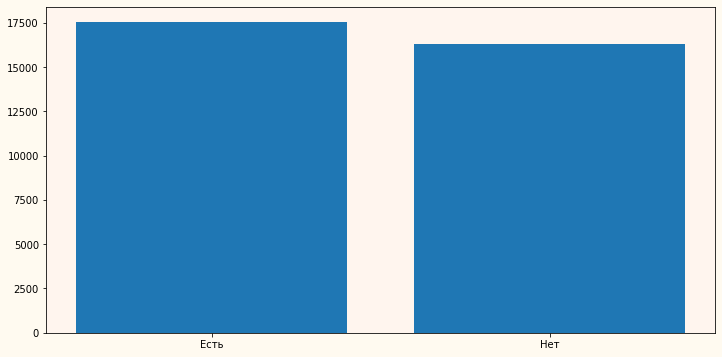

In [31]:
x_warrantly = ['Есть', 'Нет']
y_warrantly= [data[data.has_warranty == True].price_usd.mean(),data2015.price_usd.mean()]

     
fig, ax = plt.subplots()

ax.bar(x_warrantly, y_warrantly)

ax.set_facecolor('seashell')
fig.set_facecolor('floralwhite')
fig.set_figwidth(12)
fig.set_figheight(6) 

plt.show()

Из графика видно что гарантия повышает стоимость автомобиля, но не так сильно

### Количество фотографий

<AxesSubplot:xlabel='number_of_photos', ylabel='price_usd'>

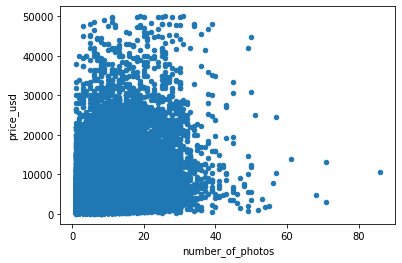

In [32]:
import matplotlib.pyplot as plt
data.plot(x='number_of_photos', y='price_usd', kind='scatter')

Как видно из графика что цены на автомобили с большим кол-вом фотографий несколько выше чем с меньшим. Есть  несколько отдельных случаев, когда фотографий около 40 и цена авто около 50000 usd. Но в целом зависимости цены от кол-ва фотогорафий почти нет

### Объем двигателя

<AxesSubplot:xlabel='engine_capacity', ylabel='price_usd'>

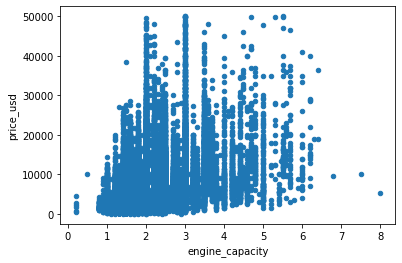

In [33]:
data.plot(x='engine_capacity', y='price_usd', kind='scatter')

Теперь сравним более свежие автомобили

<AxesSubplot:xlabel='engine_capacity', ylabel='price_usd'>

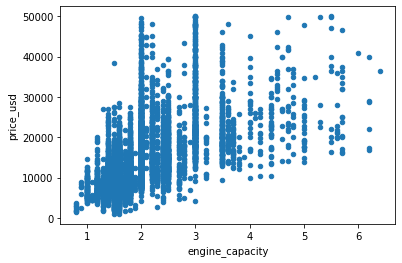

In [34]:
data_engine_capacity = data[(data.year_produced>=2010)]
data_engine_capacity.plot(x='engine_capacity', y='price_usd', kind='scatter')

Здесь минимальные цены автомобилей с большими объемами двигателей увеличились, поскольку автомобили более современные

### Кузов

График средних цен на разные кузова автомобилей

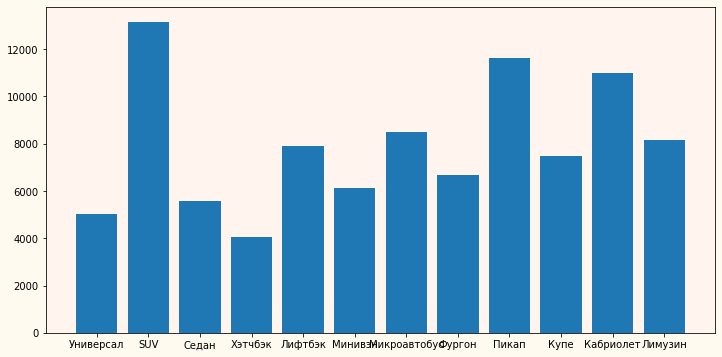

In [35]:
x_body = ['Универсал', 'SUV','Седан','Хэтчбэк', 'Лифтбэк','Минивэн','Микроавтобус', 'Фургон','Пикап','Купе', 'Кабриолет','Лимузин']
y_body= [data[data.body_type == 0].price_usd.mean(),data[data.body_type == 1].price_usd.mean(),data[data.body_type == 2].price_usd.mean(),data[data.body_type == 3].price_usd.mean()
        ,data[data.body_type == 4].price_usd.mean(),data[data.body_type == 5].price_usd.mean(),data[data.body_type == 6].price_usd.mean(),data[data.body_type == 7].price_usd.mean()
        ,data[data.body_type == 8].price_usd.mean(),data[data.body_type == 9].price_usd.mean(),data[data.body_type == 10].price_usd.mean(),data[data.body_type == 11].price_usd.mean()]
     
fig, ax = plt.subplots()

ax.bar(x_body, y_body)

ax.set_facecolor('seashell')
fig.set_facecolor('floralwhite')
fig.set_figwidth(12)
fig.set_figheight(6) 

plt.show()

График кол-ва автомобилей по типу кузова

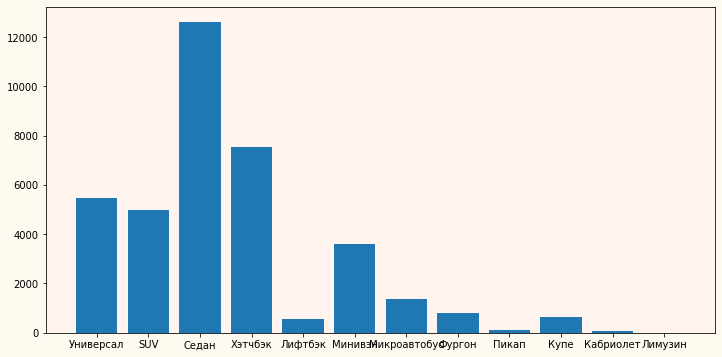

In [36]:
x_body = ['Универсал', 'SUV','Седан','Хэтчбэк', 'Лифтбэк','Минивэн','Микроавтобус', 'Фургон','Пикап','Купе', 'Кабриолет','Лимузин']
y_body= [data[data.body_type == 0].price_usd.count(),data[data.body_type == 1].price_usd.count(),data[data.body_type == 2].price_usd.count(),data[data.body_type == 3].price_usd.count()
        ,data[data.body_type == 4].price_usd.count(),data[data.body_type == 5].price_usd.count(),data[data.body_type == 6].price_usd.count(),data[data.body_type == 7].price_usd.count()
        ,data[data.body_type == 8].price_usd.count(),data[data.body_type == 9].price_usd.count(),data[data.body_type == 10].price_usd.count(),data[data.body_type == 11].price_usd.count()]
     
fig, ax = plt.subplots()

ax.bar(x_body, y_body)

ax.set_facecolor('seashell')
fig.set_facecolor('floralwhite')
fig.set_figwidth(12)
fig.set_figheight(6) 

plt.show()

Как видно из графика кабриолетов, лимузинов и пикапов на рынке очень мало. Седанов же напротив подавляющее большинство. Теперь попробуем сравнить первые 4 типа кузова. Возьмем рандомных 5000 седанов и хэтчбэков для сравнения с универсалами и SUV.

In [37]:
data_sedan = data[(data.body_type == 2)]
data_sedan

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9
3,Subaru,Impreza,1,3,10000,1999,0,False,0,3.0,...,True,False,False,False,False,False,False,False,False,False
7,Subaru,Legacy,0,2,350000,2004,0,False,0,2.5,...,False,True,True,False,False,False,False,False,False,True
17,Subaru,Impreza,1,3,191000,2005,0,False,0,2.0,...,False,True,False,False,False,False,False,False,False,True
29,Subaru,Legacy,1,1,270000,2004,0,False,0,2.0,...,False,True,True,False,False,False,False,False,False,True
33,Subaru,Legacy,1,1,123456,1991,0,False,0,2.2,...,False,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38518,Chrysler,PT Cruiser,0,3,177000,2003,0,False,0,2.4,...,False,True,False,False,False,False,False,False,False,False
38521,Chrysler,Neon,1,7,260000,1995,0,False,0,2.0,...,False,True,False,False,False,False,False,False,False,True
38524,Chrysler,300,0,2,240000,2001,0,False,0,3.5,...,False,True,False,False,True,True,False,False,True,True
38526,Chrysler,300,0,2,290000,2000,0,False,0,3.5,...,False,True,False,False,True,True,False,False,True,True


In [38]:
data_hatch = data[(data.body_type == 3)]
data_hatch

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9
13,Subaru,Justy,1,4,49999,2001,0,False,0,1.3,...,True,False,False,False,False,False,False,False,False,False
35,Subaru,Impreza,0,1,246113,2008,0,False,0,1.5,...,False,True,True,True,False,True,True,True,False,True
51,Subaru,Impreza,1,3,143000,2009,0,False,0,1.5,...,False,False,False,False,False,False,False,False,True,False
66,Subaru,Justy,1,4,80000,1992,0,False,0,1.2,...,True,False,False,False,False,False,False,False,False,False
84,Subaru,Impreza,1,3,130000,2008,0,False,0,2.5,...,False,True,True,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38498,Chrysler,PT Cruiser,0,5,100000,2006,0,False,0,2.4,...,False,True,False,False,False,False,False,False,False,False
38501,Chrysler,PT Cruiser,0,8,185075,2003,0,False,0,2.4,...,False,True,False,True,False,True,False,False,False,True
38511,Chrysler,PT Cruiser,0,9,237000,2004,0,False,0,2.4,...,False,True,True,True,True,True,True,True,True,True
38522,Chrysler,PT Cruiser,0,11,207605,2004,0,False,0,2.4,...,False,True,False,False,False,False,False,False,False,False


In [39]:
data_sedan=data_sedan.sample(n = 5000) 
data_hatch=data_hatch.sample(n = 5000) 

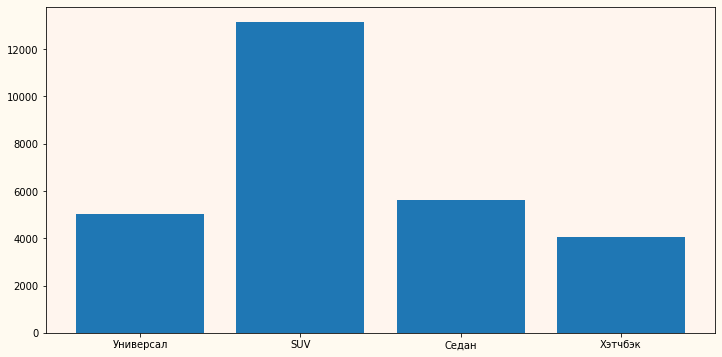

In [40]:
x_body = ['Универсал', 'SUV','Седан','Хэтчбэк']
y_body= [data[data.body_type == 0].price_usd.mean(),data[data.body_type == 1].price_usd.mean(),data_sedan[data_sedan.body_type == 2].price_usd.mean(),data_hatch[data_hatch.body_type == 3].price_usd.mean()]
     
fig, ax = plt.subplots()

ax.bar(x_body, y_body)

ax.set_facecolor('seashell')
fig.set_facecolor('floralwhite')
fig.set_figwidth(12)
fig.set_figheight(6) 

plt.show()

Как видим самый дорогой кузов это SUV.

### Цвет

Средняя цена

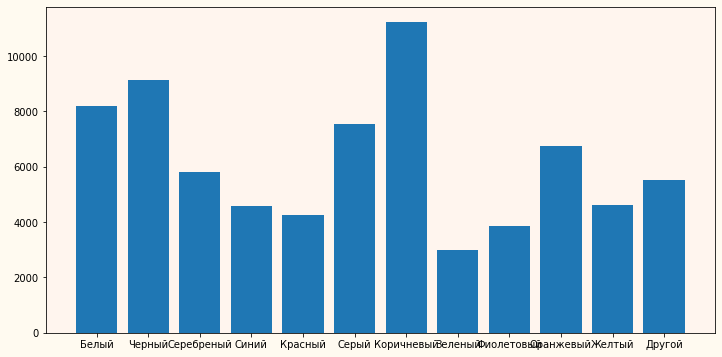

In [41]:
x_color = ['Белый', 'Черный','Серебреный','Синий', 'Красный','Серый','Коричневый', 'Зеленый','Фиолетовый','Оранжевый', 'Желтый','Другой']
y_color= [data[data.color == 0].price_usd.mean(),data[data.color == 1].price_usd.mean(),data[data.color == 2].price_usd.mean(),data[data.color == 3].price_usd.mean()
        ,data[data.color == 4].price_usd.mean(),data[data.color == 5].price_usd.mean(),data[data.color == 6].price_usd.mean(),data[data.color == 7].price_usd.mean()
        ,data[data.color == 8].price_usd.mean(),data[data.color == 9].price_usd.mean(),data[data.color == 10].price_usd.mean(),data[data.color == 11].price_usd.mean()]
     
fig, ax = plt.subplots()

ax.bar(x_color, y_color)

ax.set_facecolor('seashell')
fig.set_facecolor('floralwhite')
fig.set_figwidth(12)
fig.set_figheight(6) 

plt.show()

Кол-во автомобилей по цветам

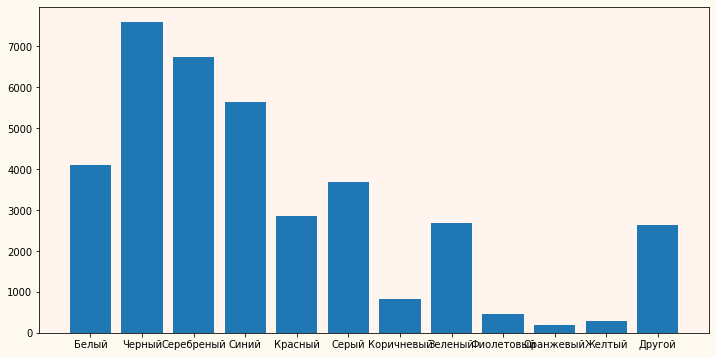

In [46]:
x_color_count = ['Белый', 'Черный','Серебреный','Синий', 'Красный','Серый','Коричневый', 'Зеленый','Фиолетовый','Оранжевый', 'Желтый','Другой']
y_color_count = [data[data.color == 0].price_usd.count(),data[data.color == 1].price_usd.count(),data[data.color == 2].price_usd.count(),data[data.color == 3].price_usd.count()
        ,data[data.color == 4].price_usd.count(),data[data.color == 5].price_usd.count(),data[data.color == 6].price_usd.count(),data[data.color == 7].price_usd.count()
        ,data[data.color == 8].price_usd.count(),data[data.color == 9].price_usd.count(),data[data.color == 10].price_usd.count(),data[data.color == 11].price_usd.count()]
     
fig, ax = plt.subplots()

ax.bar(x_color_count, y_color_count)

ax.set_facecolor('seashell')
fig.set_facecolor('floralwhite')
fig.set_figwidth(12)
fig.set_figheight(6) 

plt.show()

Самым дорогим вышел коричневый цвет, и он достаточно редкий на рынке. Самым часто встречаемым и второй по дороговизне черный.